In [17]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [6]:
#IMPORTING DATA
data=pd.read_csv('churndata.csv')

In [9]:
#PREPROCESSING
print(data.isnull().sum()[data.isnull().sum() > 0])

Series([], dtype: int64)


In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.fillna(method='ffill', inplace=True)

In [16]:
#assessing the data
data.head(5)

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,237.95,No


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cID               5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  TV_Streaming      5634 non-null   object 
 14  Movie_Streaming   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [38]:
#labels
label_encoders = {}
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'TV_Streaming',
               'Movie_Streaming', 'Contract', 'PaperlessBilling', 'Method_Payment', 'Churn']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [23]:
#splitting the data
X = data.drop(['cID','Churn'], axis=1) #dropping cid because it is object data type
y = data['Churn']

In [24]:
#checking for discrepancies in data types
print("Data types of features:\n", X.dtypes)

Data types of features:
 gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
TV_Streaming          int64
Movie_Streaming       int64
Contract              int64
PaperlessBilling      int64
Method_Payment        int64
Charges_Month       float64
TotalCharges        float64
dtype: object


In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#splitting data

In [27]:
#handling imbalanced data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [28]:
#
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [29]:
y_pred = xgb_model.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'XGBoost - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

XGBoost - Accuracy: 0.7853, F1 Score: 0.5993
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       822
           1       0.61      0.59      0.60       305

    accuracy                           0.79      1127
   macro avg       0.73      0.72      0.73      1127
weighted avg       0.78      0.79      0.78      1127

[[704 118]
 [124 181]]


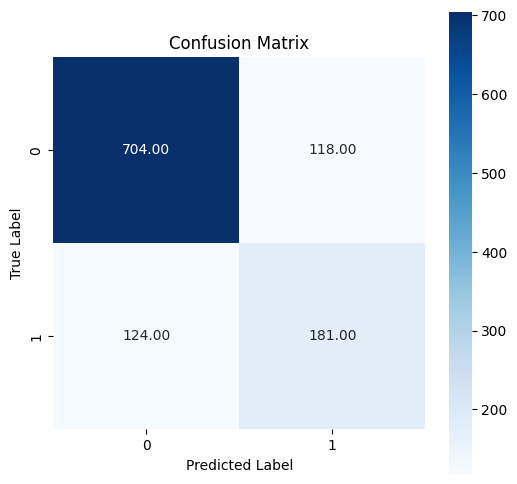

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X, y_true, cmap=plt.cm.Blues, normalize=None):
  y_pred = model.predict(X)
  cm = confusion_matrix(y_true, y_pred, normalize=normalize)
  plt.figure(figsize=(6, 6))
  sns.heatmap(cm, annot=True, cmap=cmap, fmt='.2f', square=True)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

plot_confusion_matrix(xgb_model, X_test, y_test)